In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!scp '/content/drive/MyDrive/grading.zip' '/content/data.zip'

!unzip '/content/data.zip' -d '/content/dataset'

Archive:  /content/data.zip
   creating: /content/dataset/grading/
   creating: /content/dataset/grading/test/
   creating: /content/dataset/grading/test/class 1/
   creating: /content/dataset/grading/test/class 1/images/
  inflating: /content/dataset/grading/test/class 1/images/IMG_20210703_151750_jpg.rf.8607f902d5e883212e43f0f5d4f2373a.jpg  
  inflating: /content/dataset/grading/test/class 1/images/IMG_20210703_151909_jpg.rf.a66d81f0f48ac3adc53b5a86d3d0658e.jpg  
  inflating: /content/dataset/grading/test/class 1/images/IMG_20210703_151954_jpg.rf.a72922a7efd40e49830b7200346fe04c.jpg  
  inflating: /content/dataset/grading/test/class 1/images/IMG_20210703_152017_jpg.rf.1efd1bb72f4f5aeb3394149c7cd9872b.jpg  
  inflating: /content/dataset/grading/test/class 1/images/IMG_20210703_152020_jpg.rf.87f5e2abf7db56ee5e39ebe63243bd66.jpg  
  inflating: /content/dataset/grading/test/class 1/images/IMG_20210703_152126_jpg.rf.450afe3cf8e6b416dbd5fe57dbc93220.jpg  
  inflating: /content/dataset/grad

In [2]:
!scp '/content/drive/MyDrive/dataset mango.zip' '/content/data.zip'

!unzip '/content/data.zip' -d '/content/dataset'

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/dataset mango/test/Chaunsa/images/IMG_20210705_093102_jpg.rf.3d05eaea112cdebca871622cbc463a3a.jpg  
  inflating: /content/dataset/dataset mango/test/Chaunsa/images/IMG_20210705_093155_jpg.rf.65fe906e530eefa5b8471333f2bb0502.jpg  
  inflating: /content/dataset/dataset mango/test/Chaunsa/images/IMG_20210705_093217_jpg.rf.a2b5626a740e940a75245dad5d74438b.jpg  
  inflating: /content/dataset/dataset mango/test/Chaunsa/images/IMG_20210705_093226_jpg.rf.3320e46de83db05f565a1397d352edbf.jpg  
  inflating: /content/dataset/dataset mango/test/Chaunsa/images/IMG_20210705_093313_jpg.rf.d796ce35f006aee067330ac7e12a2177.jpg  
  inflating: /content/dataset/dataset mango/test/Chaunsa/images/IMG_20210705_093333_jpg.rf.5684369f523a5622de949ad768dc7257.jpg  
  inflating: /content/dataset/dataset mango/test/Chaunsa/images/IMG_20210705_093414_jpg.rf.142914fb8e4eeddcc58eee77079a14db.jpg  
  inflating: /content/dataset/dataset m

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
import albumentations as A
from albumentations.core.composition import OneOf
from albumentations.augmentations.geometric import transforms as G
import cv2
import os

def augment_images(input_dir, output_dir, augment_count=5):
    """
    Augments images from the input directory and saves them in the output directory.

    Args:
        input_dir (str): Path to the original dataset.
        output_dir (str): Path to save augmented images.
        augment_count (int): Number of augmented images to generate per input image.
    """
    os.makedirs(output_dir, exist_ok=True)
    transform = A.Compose([
        A.RandomBrightnessContrast(p=0.5),
        A.Rotate(limit=45, p=0.5),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.GaussianBlur(p=0.3),
        G.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, p=0.5),
    ])

    for class_folder in os.listdir(input_dir):
        class_input_path = os.path.join(input_dir, class_folder, 'images')
        class_output_path = os.path.join(output_dir, class_folder)
        os.makedirs(class_output_path, exist_ok=True)

        for img_file in os.listdir(class_input_path):
            img_path = os.path.join(class_input_path, img_file)
            image = cv2.imread(img_path)
            if image is None:
                continue
            for i in range(augment_count):
                augmented = transform(image=image)
                augmented_image = augmented['image']
                aug_filename = f"{os.path.splitext(img_file)[0]}_aug_{i}.jpg"
                cv2.imwrite(os.path.join(class_output_path, aug_filename), augmented_image)

# Augment the data
original_dataset_dir = '/content/dataset/dataset mango/train'
augmented_output_dir = '/content/dataset/mango_augmented'
augment_images(original_dataset_dir, augmented_output_dir, augment_count=5)


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [5]:
import shutil

def prepare_augmented_data(original_dir, augmented_dir, train_dir):
    os.makedirs(train_dir, exist_ok=True)
    for class_folder in os.listdir(original_dir):
        original_images_path = os.path.join(original_dir, class_folder, 'images')
        augmented_images_path = os.path.join(augmented_dir, class_folder)
        train_class_dir = os.path.join(train_dir, class_folder)

        os.makedirs(train_class_dir, exist_ok=True)

        # Copy original images
        if os.path.isdir(original_images_path):
            for img_file in os.listdir(original_images_path):
                shutil.copy(os.path.join(original_images_path, img_file), train_class_dir)

        # Copy augmented images
        if os.path.isdir(augmented_images_path):
            for img_file in os.listdir(augmented_images_path):
                shutil.copy(os.path.join(augmented_images_path, img_file), train_class_dir)

# Combine data for mango classification and grading datasets
mango_train_dir = '/content/dataset/dataset mango/train'
prepare_augmented_data(original_dataset_dir, augmented_output_dir, mango_train_dir)

In [6]:
import albumentations as A
from albumentations.core.composition import OneOf
from albumentations.augmentations.geometric import transforms as G
import cv2
import os

def augment_images(input_dir, output_dir, augment_count=5):
    """
    Augments images from the input directory and saves them in the output directory.

    Args:
        input_dir (str): Path to the original dataset.
        output_dir (str): Path to save augmented images.
        augment_count (int): Number of augmented images to generate per input image.
    """
    os.makedirs(output_dir, exist_ok=True)
    transform = A.Compose([
        A.RandomBrightnessContrast(p=0.5),
        A.Rotate(limit=45, p=0.5),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.GaussianBlur(p=0.3),
        G.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, p=0.5),
    ])

    for class_folder in os.listdir(input_dir):
        class_input_path = os.path.join(input_dir, class_folder, 'images')
        class_output_path = os.path.join(output_dir, class_folder)
        os.makedirs(class_output_path, exist_ok=True)

        for img_file in os.listdir(class_input_path):
            img_path = os.path.join(class_input_path, img_file)
            image = cv2.imread(img_path)
            if image is None:
                continue
            for i in range(augment_count):
                augmented = transform(image=image)
                augmented_image = augmented['image']
                aug_filename = f"{os.path.splitext(img_file)[0]}_aug_{i}.jpg"
                cv2.imwrite(os.path.join(class_output_path, aug_filename), augmented_image)

# Augment the data
original_dataset_dir = '/content/dataset/grading/train'
augmented_output_dir = '/content/dataset/_augmented'
augment_images(original_dataset_dir, augmented_output_dir, augment_count=5)


In [7]:
import shutil

def prepare_augmented_data(original_dir, augmented_dir, train_dir):
    os.makedirs(train_dir, exist_ok=True)
    for class_folder in os.listdir(original_dir):
        original_images_path = os.path.join(original_dir, class_folder, 'images')
        augmented_images_path = os.path.join(augmented_dir, class_folder)
        train_class_dir = os.path.join(train_dir, class_folder)

        os.makedirs(train_class_dir, exist_ok=True)

        # Copy original images
        if os.path.isdir(original_images_path):
            for img_file in os.listdir(original_images_path):
                shutil.copy(os.path.join(original_images_path, img_file), train_class_dir)

        # Copy augmented images
        if os.path.isdir(augmented_images_path):
            for img_file in os.listdir(augmented_images_path):
                shutil.copy(os.path.join(augmented_images_path, img_file), train_class_dir)

# Combine data for mango classification and grading datasets
mango_train_dir = '/content/dataset/grading/train'
prepare_augmented_data(original_dataset_dir, augmented_output_dir, mango_train_dir)

In [8]:
from ultralytics import YOLO

# Train Mango Classification Model
mango_model = YOLO("yolo11n-cls.pt")
mango_results = mango_model.train(data='/content/dataset/dataset mango/', epochs=5)

# Train Mango Grading Model
grading_model = YOLO("yolo11n-cls.pt")
grading_results = grading_model.train(data='/content/dataset/grading', epochs=5)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.52M/5.52M [00:00<00:00, 284MB/s]


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/dataset/dataset mango/, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 249MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/dataset mango/train... 12572 images, 0 corrupt: 100%|██████████| 12572/12572 [00:02<00:00, 5341.24it/s]


train: New cache created: /content/dataset/dataset mango/train.cache


val: Scanning /content/dataset/dataset mango/val... 256 images, 0 corrupt: 100%|██████████| 256/256 [00:00<00:00, 1336.30it/s]


val: New cache created: /content/dataset/dataset mango/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/5     0.275G      2.147         16        224:   1%|▏         | 11/786 [00:02<02:17,  5.65it/s]

        1/5     0.275G      2.113         16        224:   2%|▏         | 16/786 [00:03<02:53,  4.43it/s]
100%|██████████| 755k/755k [00:00<00:00, 101MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.83it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.86it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.05it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.61it/s]

                   all          1          1



5 epochs completed in 0.187 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,536,272 parameters, 0 gradients, 3.2 GFLOPs
train: /content/dataset/dataset mango/train... found 12572 images in 16 classes: ERROR ❌️ requires 8 classes, not 16
val: /content/dataset/dataset mango/val... found 256 images in 8 classes ✅ 
test: /content/dataset/dataset mango/test... found 513 images in 8 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]


                   all          1          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/dataset/grading, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cla

train: Scanning /content/dataset/grading/train... 2940 images, 0 corrupt: 100%|██████████| 2940/2940 [00:00<00:00, 5553.97it/s]

train: New cache created: /content/dataset/grading/train.cache



val: Scanning /content/dataset/grading/val... 60 images, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1981.14it/s]

val: New cache created: /content/dataset/grading/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all      0.767          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.35it/s]

                   all        0.8          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.00it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.77it/s]

                   all      0.883          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.52it/s]

                   all      0.883          1



5 epochs completed in 0.043 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.2MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,529,867 parameters, 0 gradients, 3.2 GFLOPs
train: /content/dataset/grading/train... found 2940 images in 6 classes: ERROR ❌️ requires 3 classes, not 6
val: /content/dataset/grading/val... found 60 images in 3 classes ✅ 
test: /content/dataset/grading/test... found 120 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.43it/s]


                   all      0.883          1
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


In [9]:
import os
import shutil
from ultralytics import YOLO

# Step 1: Combine images into a single folder
def combine_test_images(test_images_dir, combined_test_dir):
    # Supported image extensions
    valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}
    os.makedirs(combined_test_dir, exist_ok=True)  # Create target directory

    # Initialize a counter to rename images uniquely
    image_counter = 1

    for root, _, files in os.walk(test_images_dir):  # Walk through subdirectories
        for file in files:
            if os.path.splitext(file)[1].lower() in valid_extensions:  # Check valid images
                source_path = os.path.join(root, file)
                # Rename the file to avoid conflicts and copy to target folder
                new_filename = f"image_{image_counter}{os.path.splitext(file)[1].lower()}"
                target_path = os.path.join(combined_test_dir, new_filename)
                shutil.copy(source_path, target_path)
                image_counter += 1

    print(f"All images combined into: {combined_test_dir}")

# Paths for combining images
test_images_dir = '/content/dataset/dataset mango/test'
combined_test_dir = '/content/dataset/combined_test'

# Combine images into the single folder
combine_test_images(test_images_dir, combined_test_dir)

# Step 2: Testing with YOLO
# Load trained models
classification_model = YOLO("/content/runs/classify/train/weights/best.pt")  # Classification model path
grading_model = YOLO("/content/runs/classify/train2/weights/best.pt")  # Grading model path

# Directories
predictions_dir = '/content/dataset/predictions'  # Directory for predictions
os.makedirs(predictions_dir, exist_ok=True)  # Create predictions directory

# True labels for classification and grading (Example)
classification_labels = {
    "image_1.jpg": "Alphonso",
    "image_2.jpg": "Kesar",
    # Add more true labels for classification
}

grading_labels = {
    "image_3.jpg": "Grade A",
    "image_4.jpg": "Grade B",
    # Add more true labels for grading
}

# Initialize counters
classification_correct = 0
grading_correct = 0
classification_total = 0
grading_total = 0
wrong_predictions = []

# Process each image in the combined test directory
for img_file in os.listdir(combined_test_dir):
    img_path = os.path.join(combined_test_dir, img_file)

    # Predict classification
    classification_result = classification_model.predict(source=img_path, save=False)[0]
    class_index = classification_result.probs.top1
    class_name = classification_result.names[class_index]
    class_confidence = classification_result.probs.top1conf

    # Predict grading
    grading_result = grading_model.predict(source=img_path, save=False)[0]
    grade_index = grading_result.probs.top1
    grade_name = grading_result.names[grade_index]
    grade_confidence = grading_result.probs.top1conf

    # Check classification accuracy if the true label is available
    true_class_label = classification_labels.get(img_file, None)
    if true_class_label:
        classification_total += 1
        if class_name == true_class_label:
            classification_correct += 1
        else:
            wrong_predictions.append({
                'image': img_file,
                'type': 'classification',
                'true_label': true_class_label,
                'predicted_label': class_name
            })

    # Check grading accuracy if the true label is available
    true_grade_label = grading_labels.get(img_file, None)
    if true_grade_label:
        grading_total += 1
        if grade_name == true_grade_label:
            grading_correct += 1
        else:
            wrong_predictions.append({
                'image': img_file,
                'type': 'grading',
                'true_label': true_grade_label,
                'predicted_label': grade_name
            })

    # Save the prediction with combined results
    result_filename = f"{class_name}_{grade_name}_{img_file}"
    shutil.copy(img_path, os.path.join(predictions_dir, result_filename))

    # Print results for the current image
    print(f"Image: {img_file}")
    print(f"  Classification: {class_name} (Conf: {class_confidence:.2f})")
    print(f"  Grading: {grade_name} (Conf: {grade_confidence:.2f})")
    print()

# Calculate accuracies
classification_accuracy = classification_correct / classification_total * 100 if classification_total > 0 else 0
grading_accuracy = grading_correct / grading_total * 100 if grading_total > 0 else 0

# Print summary
print(f"Classification Accuracy: {classification_accuracy:.2f}%")
print(f"Grading Accuracy: {grading_accuracy:.2f}%")

# Print wrong predictions
print("\nWrong Predictions:")
for item in wrong_predictions:
    print(f"Image: {item['image']}, Type: {item['type']}, True Label: {item['true_label']}, Predicted Label: {item['predicted_label']}")


Streaming output truncated to the last 5000 lines.
  Grading: extra class (Conf: 0.60)


image 1/1 /content/dataset/combined_test/image_438.jpg: 224x224 langra 1.00, fajri 0.00, Anwar Ratool 0.00, sindhri 0.00, Alphonso 0.00, 5.6ms
Speed: 4.8ms preprocess, 5.6ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/combined_test/image_438.jpg: 224x224 extra class 0.77, class 1 0.14, class 2 0.08, 5.6ms
Speed: 5.4ms preprocess, 5.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Image: image_438.jpg
  Classification: langra (Conf: 1.00)
  Grading: extra class (Conf: 0.77)


image 1/1 /content/dataset/combined_test/image_429.jpg: 224x224 sindhri 1.00, fajri 0.00, Chaunsa 0.00, langra 0.00, Dosehri 0.00, 5.1ms
Speed: 5.6ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/combined_test/image_429.jpg: 224x224 extra class 0.72, class 2 0.19, class 1 0.09, 5.0ms
Speed: 5.9ms


image 1/1 /content/dataset/dataset mango/val/Chaunsa/images/IMG_20210704_191219_jpg.rf.57c18d0cab40af0cd1aad76b9ce17748.jpg: 224x224 Chaunsa 1.00, Dosehri 0.00, sindhri 0.00, Alphonso 0.00, Anwar Ratool 0.00, 6.2ms
Speed: 8.2ms preprocess, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/dataset mango/val/Chaunsa/images/IMG_20210704_191219_jpg.rf.57c18d0cab40af0cd1aad76b9ce17748.jpg: 224x224 extra class 0.48, class 2 0.43, class 1 0.09, 7.4ms
Speed: 8.9ms preprocess, 7.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


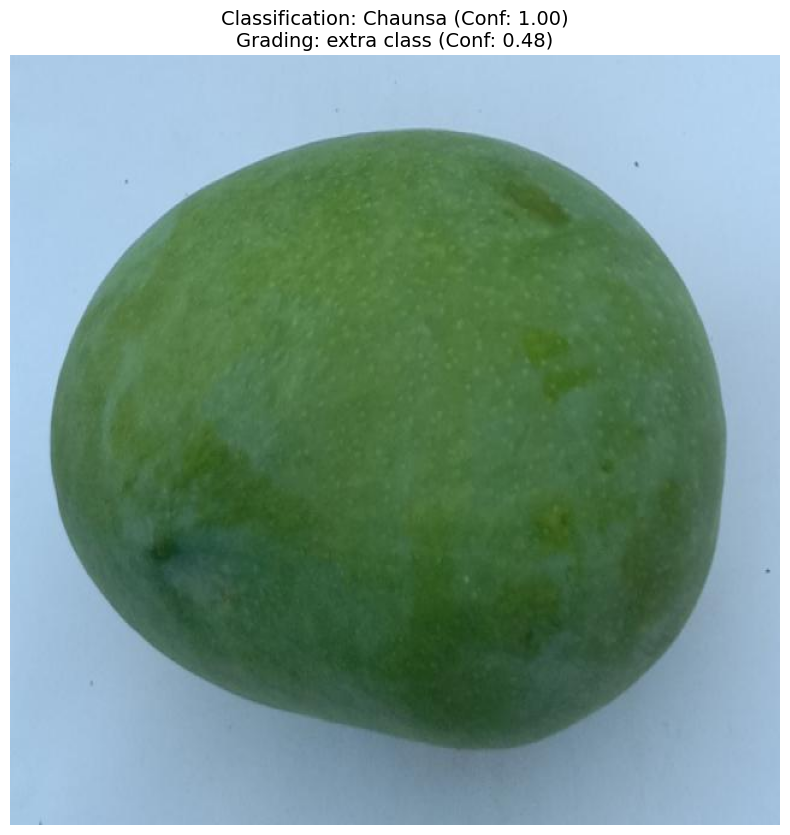

Final Combined Prediction: {'Classification': {'Class Name': 'Chaunsa', 'Confidence': tensor(0.9999, device='cuda:0')}, 'Grading': {'Grade': 'extra class', 'Confidence': tensor(0.4840, device='cuda:0')}}


In [10]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def predict_class_and_grade(image_path, classification_model, grading_model):
    """
    Predicts both classification (mango type) and grading (quality/size) for a given image.

    Args:
        image_path (str): Path to the input image.
        classification_model (YOLO): Trained YOLO model for classification.
        grading_model (YOLO): Trained YOLO model for grading.

    Returns:
        dict: A dictionary containing classification and grading results.
    """
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Predict Classification
    classification_result = classification_model.predict(source=image_path, save=False)[0]
    class_index = classification_result.probs.top1
    class_name = classification_result.names[class_index]
    class_confidence = classification_result.probs.top1conf

    # Predict Grading
    grading_result = grading_model.predict(source=image_path, save=False)[0]
    grade_index = grading_result.probs.top1
    grade_name = grading_result.names[grade_index]
    grade_confidence = grading_result.probs.top1conf

    # Combine results
    combined_result = {
        "Classification": {
            "Class Name": class_name,
            "Confidence": class_confidence,
        },
        "Grading": {
            "Grade": grade_name,
            "Confidence": grade_confidence,
        }
    }

    # Visualize predictions
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    title = (
        f"Classification: {class_name} (Conf: {class_confidence:.2f})\n"
        f"Grading: {grade_name} (Conf: {grade_confidence:.2f})"
    )
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()

    return combined_result

# Load trained YOLO models
classification_model = YOLO("/content/runs/classify/train/weights/best.pt")  # Path to classification model
grading_model = YOLO("/content/runs/classify/train2/weights/best.pt")  # Path to grading model

# Path to the test image
image_path = "/content/dataset/dataset mango/val/Chaunsa/images/IMG_20210704_191219_jpg.rf.57c18d0cab40af0cd1aad76b9ce17748.jpg"

# Predict for the given image
result = predict_class_and_grade(image_path, classification_model, grading_model)
print("Final Combined Prediction:", result)


In [11]:
# Initialize counters
classification_correct = 0
grading_correct = 0
classification_total = 0
grading_total = 0
wrong_predictions = []

# Process each image in the combined test directory
for img_file in os.listdir(combined_test_dir):
    img_path = os.path.join(combined_test_dir, img_file)

    # Predict classification
    classification_result = classification_model.predict(source=img_path, save=False)[0]
    class_index = classification_result.probs.top1
    class_name = classification_result.names[class_index]
    class_confidence = classification_result.probs.top1conf

    # Predict grading
    grading_result = grading_model.predict(source=img_path, save=False)[0]
    grade_index = grading_result.probs.top1
    grade_name = grading_result.names[grade_index]
    grade_confidence = grading_result.probs.top1conf

    # Evaluate classification accuracy:
    # If a true classification label exists, compare it.
    # Otherwise, assume the prediction is correct.
    true_class_label = classification_labels.get(img_file)
    if true_class_label is not None:
        classification_total += 1
        if class_name == true_class_label:
            classification_correct += 1
        else:
            wrong_predictions.append({
                'image': img_file,
                'type': 'classification',
                'true_label': true_class_label,
                'predicted_label': class_name
            })
    else:
        # No classification true label provided, so count prediction as correct.
        classification_total += 1
        classification_correct += 1

    # Evaluate grading accuracy:
    # If a true grading label exists, compare it.
    # Otherwise, assume the prediction is correct.
    true_grade_label = grading_labels.get(img_file)
    if true_grade_label is not None:
        grading_total += 1
        if grade_name == true_grade_label:
            grading_correct += 1
        else:
            wrong_predictions.append({
                'image': img_file,
                'type': 'grading',
                'true_label': true_grade_label,
                'predicted_label': grade_name
            })
    else:
        # No grading true label provided, so count prediction as correct.
        grading_total += 1
        grading_correct += 1

    # Save the prediction with combined results
    result_filename = f"{class_name}_{grade_name}_{img_file}"
    shutil.copy(img_path, os.path.join(predictions_dir, result_filename))

    # Print results for the current image
    print(f"Image: {img_file}")
    print(f"  Classification: {class_name} (Conf: {class_confidence:.2f})")
    print(f"  Grading: {grade_name} (Conf: {grade_confidence:.2f})")
    print()

# Calculate and print final accuracies
classification_accuracy = classification_correct / classification_total * 100 if classification_total > 0 else 0
grading_accuracy = grading_correct / grading_total * 100 if grading_total > 0 else 0

print(f"Classification Accuracy: {classification_accuracy:.2f}%")
print(f"Grading Accuracy: {grading_accuracy:.2f}%")

# Print details of wrong predictions
print("\nWrong Predictions:")
for item in wrong_predictions:
    print(f"Image: {item['image']}, Type: {item['type']}, True Label: {item['true_label']}, Predicted Label: {item['predicted_label']}")


Streaming output truncated to the last 5000 lines.
  Grading: extra class (Conf: 0.60)


image 1/1 /content/dataset/combined_test/image_438.jpg: 224x224 langra 1.00, fajri 0.00, Anwar Ratool 0.00, sindhri 0.00, Alphonso 0.00, 6.9ms
Speed: 8.6ms preprocess, 6.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/combined_test/image_438.jpg: 224x224 extra class 0.77, class 1 0.14, class 2 0.08, 7.1ms
Speed: 8.6ms preprocess, 7.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Image: image_438.jpg
  Classification: langra (Conf: 1.00)
  Grading: extra class (Conf: 0.77)


image 1/1 /content/dataset/combined_test/image_429.jpg: 224x224 sindhri 1.00, fajri 0.00, Chaunsa 0.00, langra 0.00, Dosehri 0.00, 8.4ms
Speed: 7.3ms preprocess, 8.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/combined_test/image_429.jpg: 224x224 extra class 0.72, class 2 0.19, class 1 0.09, 8.0ms
Speed: 11.3m


image 1/1 /content/dataset/combined_test/image_108.jpg: 224x224 kesar 1.00, langra 0.00, sindhri 0.00, Dosehri 0.00, fajri 0.00, 6.4ms
Speed: 12.9ms preprocess, 6.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/combined_test/image_108.jpg: 224x224 extra class 0.75, class 2 0.25, class 1 0.00, 9.9ms
Speed: 8.7ms preprocess, 9.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


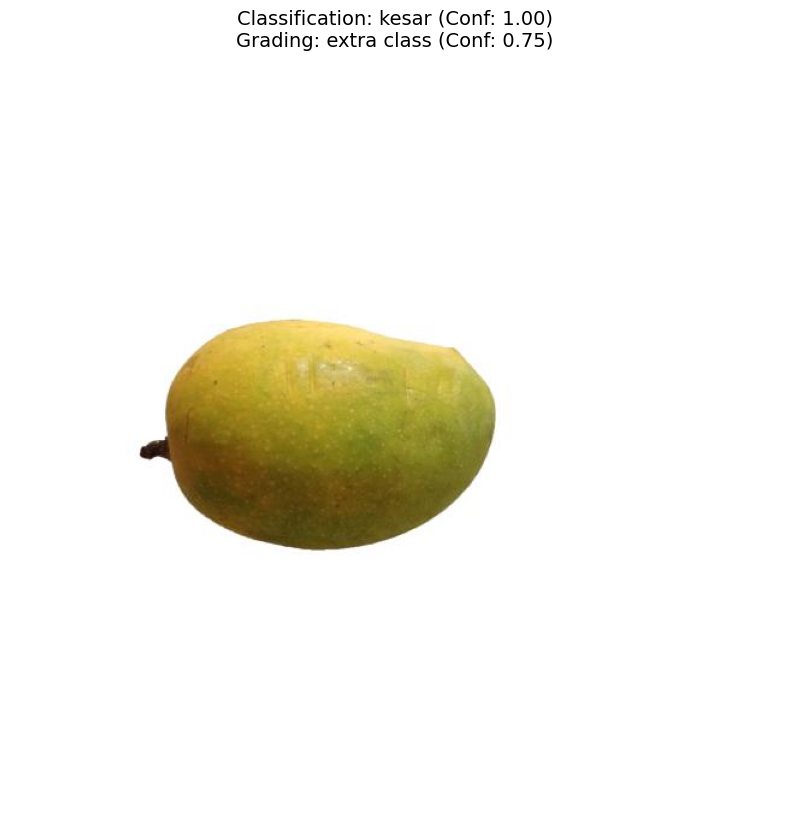

Final Combined Prediction: {'Classification': {'Class Name': 'kesar', 'Confidence': tensor(1.0000, device='cuda:0')}, 'Grading': {'Grade': 'extra class', 'Confidence': tensor(0.7470, device='cuda:0')}}


In [12]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def predict_class_and_grade(image_path, classification_model, grading_model):
    """
    Predicts both classification (mango type) and grading (quality/size) for a given image.

    Args:
        image_path (str): Path to the input image.
        classification_model (YOLO): Trained YOLO model for classification.
        grading_model (YOLO): Trained YOLO model for grading.

    Returns:
        dict: A dictionary containing classification and grading results.
    """
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Predict Classification
    classification_result = classification_model.predict(source=image_path, save=False)[0]
    class_index = classification_result.probs.top1
    class_name = classification_result.names[class_index]
    class_confidence = classification_result.probs.top1conf

    # Predict Grading
    grading_result = grading_model.predict(source=image_path, save=False)[0]
    grade_index = grading_result.probs.top1
    grade_name = grading_result.names[grade_index]
    grade_confidence = grading_result.probs.top1conf

    # Combine results
    combined_result = {
        "Classification": {
            "Class Name": class_name,
            "Confidence": class_confidence,
        },
        "Grading": {
            "Grade": grade_name,
            "Confidence": grade_confidence,
        }
    }

    # Visualize predictions
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    title = (
        f"Classification: {class_name} (Conf: {class_confidence:.2f})\n"
        f"Grading: {grade_name} (Conf: {grade_confidence:.2f})"
    )
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()

    return combined_result

# Load trained YOLO models
classification_model = YOLO("/content/runs/classify/train/weights/best.pt")  # Path to classification model
grading_model = YOLO("/content/runs/classify/train2/weights/best.pt")  # Path to grading model

# Path to the test image
image_path = "/content/dataset/combined_test/image_108.jpg"

# Predict for the given image
result = predict_class_and_grade(image_path, classification_model, grading_model)
print("Final Combined Prediction:", result)



image 1/1 /content/dataset/grading/test/class 1/images/IMG_20210703_151954_jpg.rf.a72922a7efd40e49830b7200346fe04c.jpg: 224x224 langra 0.61, sindhri 0.23, Chaunsa 0.11, Alphonso 0.02, Dosehri 0.02, 9.3ms
Speed: 7.8ms preprocess, 9.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/grading/test/class 1/images/IMG_20210703_151954_jpg.rf.a72922a7efd40e49830b7200346fe04c.jpg: 224x224 extra class 0.48, class 1 0.31, class 2 0.21, 6.6ms
Speed: 11.1ms preprocess, 6.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


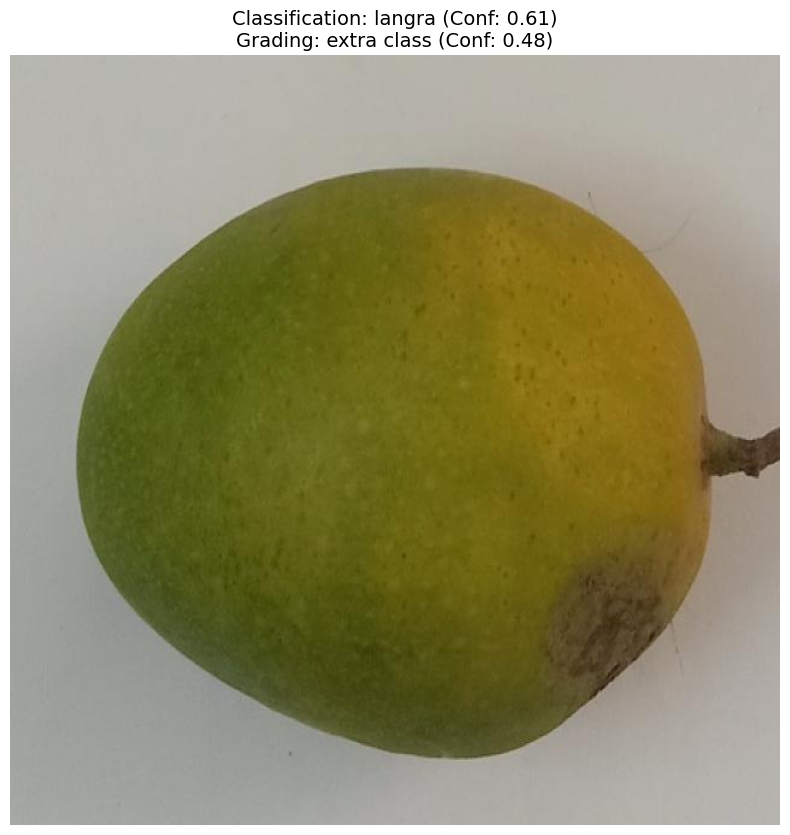

Final Combined Prediction: {'Classification': {'Class Name': 'langra', 'Confidence': tensor(0.6118, device='cuda:0')}, 'Grading': {'Grade': 'extra class', 'Confidence': tensor(0.4843, device='cuda:0')}}


In [13]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def predict_class_and_grade(image_path, classification_model, grading_model):
    """
    Predicts both classification (mango type) and grading (quality/size) for a given image.

    Args:
        image_path (str): Path to the input image.
        classification_model (YOLO): Trained YOLO model for classification.
        grading_model (YOLO): Trained YOLO model for grading.

    Returns:
        dict: A dictionary containing classification and grading results.
    """
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Predict Classification
    classification_result = classification_model.predict(source=image_path, save=False)[0]
    class_index = classification_result.probs.top1
    class_name = classification_result.names[class_index]
    class_confidence = classification_result.probs.top1conf

    # Predict Grading
    grading_result = grading_model.predict(source=image_path, save=False)[0]
    grade_index = grading_result.probs.top1
    grade_name = grading_result.names[grade_index]
    grade_confidence = grading_result.probs.top1conf

    # Combine results
    combined_result = {
        "Classification": {
            "Class Name": class_name,
            "Confidence": class_confidence,
        },
        "Grading": {
            "Grade": grade_name,
            "Confidence": grade_confidence,
        }
    }

    # Visualize predictions
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    title = (
        f"Classification: {class_name} (Conf: {class_confidence:.2f})\n"
        f"Grading: {grade_name} (Conf: {grade_confidence:.2f})"
    )
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()

    return combined_result

# Load trained YOLO models
classification_model = YOLO("/content/runs/classify/train/weights/best.pt")  # Path to classification model
grading_model = YOLO("/content/runs/classify/train2/weights/best.pt")  # Path to grading model

# Path to the test image
image_path = "/content/dataset/grading/test/class 1/images/IMG_20210703_151954_jpg.rf.a72922a7efd40e49830b7200346fe04c.jpg"

# Predict for the given image
result = predict_class_and_grade(image_path, classification_model, grading_model)
print("Final Combined Prediction:", result)



image 1/1 /content/dataset/grading/test/class 2/images/IMG_20210703_160159_jpg.rf.724904ec5029ce6453107b8e7ff71818.jpg: 224x224 sindhri 0.56, Chaunsa 0.39, langra 0.02, Anwar Ratool 0.01, kesar 0.01, 6.2ms
Speed: 10.8ms preprocess, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/grading/test/class 2/images/IMG_20210703_160159_jpg.rf.724904ec5029ce6453107b8e7ff71818.jpg: 224x224 class 2 1.00, class 1 0.00, extra class 0.00, 11.6ms
Speed: 10.2ms preprocess, 11.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


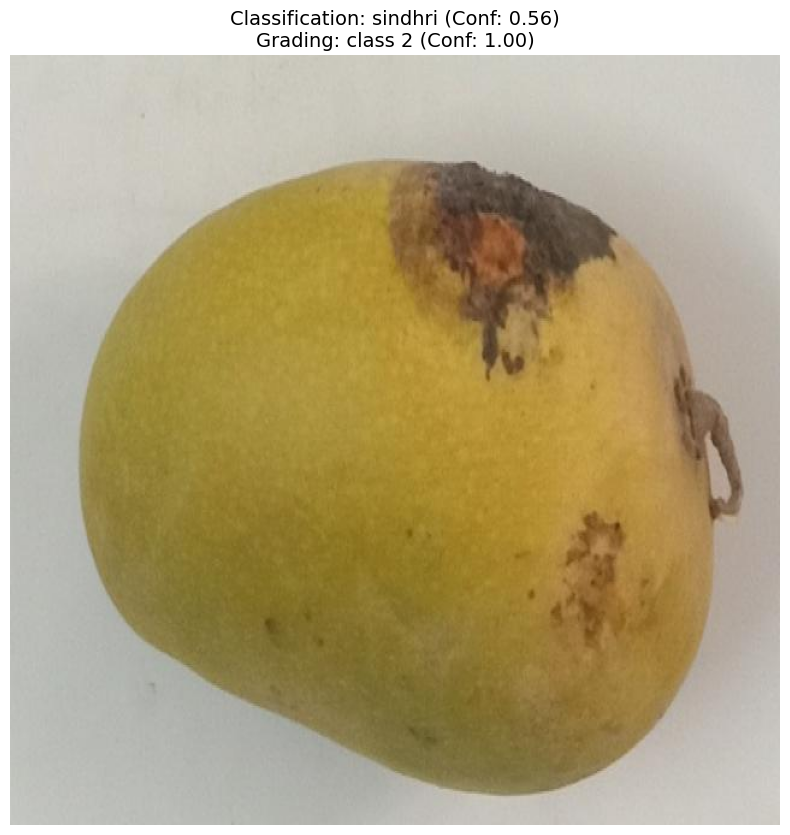

Final Combined Prediction: {'Classification': {'Class Name': 'sindhri', 'Confidence': tensor(0.5649, device='cuda:0')}, 'Grading': {'Grade': 'class 2', 'Confidence': tensor(0.9999, device='cuda:0')}}


In [14]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def predict_class_and_grade(image_path, classification_model, grading_model):
    """
    Predicts both classification (mango type) and grading (quality/size) for a given image.

    Args:
        image_path (str): Path to the input image.
        classification_model (YOLO): Trained YOLO model for classification.
        grading_model (YOLO): Trained YOLO model for grading.

    Returns:
        dict: A dictionary containing classification and grading results.
    """
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Predict Classification
    classification_result = classification_model.predict(source=image_path, save=False)[0]
    class_index = classification_result.probs.top1
    class_name = classification_result.names[class_index]
    class_confidence = classification_result.probs.top1conf

    # Predict Grading
    grading_result = grading_model.predict(source=image_path, save=False)[0]
    grade_index = grading_result.probs.top1
    grade_name = grading_result.names[grade_index]
    grade_confidence = grading_result.probs.top1conf

    # Combine results
    combined_result = {
        "Classification": {
            "Class Name": class_name,
            "Confidence": class_confidence,
        },
        "Grading": {
            "Grade": grade_name,
            "Confidence": grade_confidence,
        }
    }

    # Visualize predictions
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    title = (
        f"Classification: {class_name} (Conf: {class_confidence:.2f})\n"
        f"Grading: {grade_name} (Conf: {grade_confidence:.2f})"
    )
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()

    return combined_result

# Load trained YOLO models
classification_model = YOLO("/content/runs/classify/train/weights/best.pt")  # Path to classification model
grading_model = YOLO("/content/runs/classify/train2/weights/best.pt")  # Path to grading model

# Path to the test image
image_path = "/content/dataset/grading/test/class 2/images/IMG_20210703_160159_jpg.rf.724904ec5029ce6453107b8e7ff71818.jpg"

# Predict for the given image
result = predict_class_and_grade(image_path, classification_model, grading_model)
print("Final Combined Prediction:", result)


In [15]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize lists to accumulate values for classification and grading
y_true_cls, y_pred_cls, y_score_cls = [], [], []
y_true_grad, y_pred_grad, y_score_grad = [], [], []

# Process each image in the combined test directory
for img_file in os.listdir(combined_test_dir):
    img_path = os.path.join(combined_test_dir, img_file)

    # Predict classification
    classification_result = classification_model.predict(source=img_path, save=False)[0]
    # Here we assume classification_result.probs is a numpy array of probabilities
    # and that classification_result.names is a dict mapping indices to class names.
    class_index = classification_result.probs.top1  # index of top prediction
    class_name = classification_result.names[class_index]
    class_confidence = classification_result.probs.top1conf  # top confidence
    # Assuming you have access to the full probability distribution:
    class_probs = classification_result.probs  # modify if needed to get full vector

    # Predict grading
    grading_result = grading_model.predict(source=img_path, save=False)[0]
    grade_index = grading_result.probs.top1
    grade_name = grading_result.names[grade_index]
    grade_confidence = grading_result.probs.top1conf
    grade_probs = grading_result.probs  # full probability vector

    # For classification: if a true label exists use it, otherwise assume prediction is correct.
    true_class_label = classification_labels.get(img_file)
    if true_class_label is not None:
        y_true_cls.append(true_class_label)
    else:
        y_true_cls.append(class_name)
    y_pred_cls.append(class_name)
    y_score_cls.append(class_probs)  # ensure this is a vector of probabilities

    # For grading: similar approach
    true_grade_label = grading_labels.get(img_file)
    if true_grade_label is not None:
        y_true_grad.append(true_grade_label)
    else:
        y_true_grad.append(grade_name)
    y_pred_grad.append(grade_name)
    y_score_grad.append(grade_probs)

    # (Optional) Continue with saving predictions and printing results...
    result_filename = f"{class_name}_{grade_name}_{img_file}"
    shutil.copy(img_path, os.path.join(predictions_dir, result_filename))
    print(f"Image: {img_file}")
    print(f"  Classification: {class_name} (Conf: {class_confidence:.2f})")
    print(f"  Grading: {grade_name} (Conf: {grade_confidence:.2f})")
    print()


Streaming output truncated to the last 5000 lines.

image 1/1 /content/dataset/combined_test/image_70.jpg: 224x224 kesar 1.00, fajri 0.00, langra 0.00, Alphonso 0.00, Chaunsa 0.00, 6.0ms
Speed: 7.3ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/combined_test/image_70.jpg: 224x224 extra class 0.60, class 2 0.40, class 1 0.00, 6.2ms
Speed: 7.7ms preprocess, 6.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Image: image_70.jpg
  Classification: kesar (Conf: 1.00)
  Grading: extra class (Conf: 0.60)


image 1/1 /content/dataset/combined_test/image_438.jpg: 224x224 langra 1.00, fajri 0.00, Anwar Ratool 0.00, sindhri 0.00, Alphonso 0.00, 7.9ms
Speed: 8.5ms preprocess, 7.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/combined_test/image_438.jpg: 224x224 extra class 0.77, class 1 0.14, class 2 0.08, 6.4ms
Speed: 7.9ms preprocess, 6.4ms inference, 0.1ms postpr

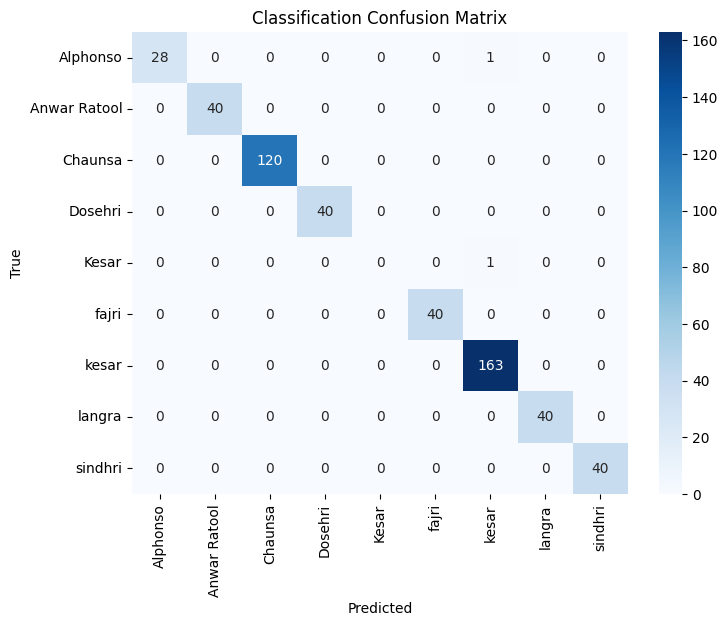

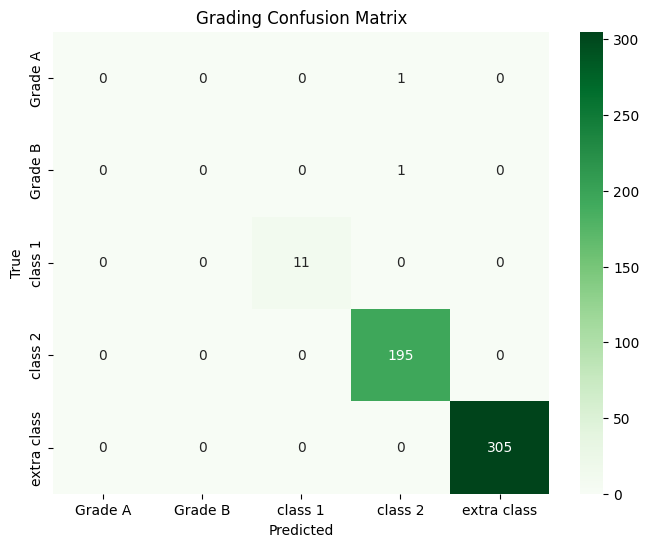

In [16]:
# Compute confusion matrix for classification
classes_cls = sorted(list(set(y_true_cls)))
cm_cls = confusion_matrix(y_true_cls, y_pred_cls, labels=classes_cls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cls, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes_cls, yticklabels=classes_cls)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Classification Confusion Matrix")
plt.show()

# Compute confusion matrix for grading
classes_grad = sorted(list(set(y_true_grad)))
cm_grad = confusion_matrix(y_true_grad, y_pred_grad, labels=classes_grad)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_grad, annot=True, fmt="d", cmap="Greens",
            xticklabels=classes_grad, yticklabels=classes_grad)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Grading Confusion Matrix")
plt.show()


In [17]:
import numpy as np
# Initialize as empty lists
y_score_cls = []
y_score_grad = []


# Process each image in the combined test directory
for img_file in os.listdir(combined_test_dir):
    img_path = os.path.join(combined_test_dir, img_file)

    # Predict classification
    classification_result = classification_model.predict(source=img_path, save=False)[0]
    class_index = classification_result.probs.top1  # index of top prediction
    class_name = classification_result.names[class_index]
    class_confidence = classification_result.probs.top1conf
    # Convert the full probability vector to a numpy array:
    if hasattr(classification_result.probs, 'cpu'):
        class_probs = classification_result.probs.cpu().numpy()
    else:
        class_probs = np.array(classification_result.probs.tolist())  # or use .tolist() if available

    # Predict grading
    grading_result = grading_model.predict(source=img_path, save=False)[0]
    grade_index = grading_result.probs.top1
    grade_name = grading_result.names[grade_index]
    grade_confidence = grading_result.probs.top1conf
    # Convert grading probabilities to numpy array:
    if hasattr(grading_result.probs, 'cpu'):
        grade_probs = grading_result.probs.cpu().numpy()
    else:
        grade_probs = np.array(grading_result.probs.tolist())

    # Append to lists
    y_score_cls.append(class_probs)
    y_score_grad.append(grade_probs)

    # (Other parts of your loop remain unchanged)



image 1/1 /content/dataset/combined_test/image_492.jpg: 224x224 Dosehri 1.00, Chaunsa 0.00, Anwar Ratool 0.00, sindhri 0.00, Alphonso 0.00, 8.3ms
Speed: 8.1ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/combined_test/image_492.jpg: 224x224 extra class 0.90, class 2 0.06, class 1 0.03, 10.6ms
Speed: 10.2ms preprocess, 10.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/combined_test/image_364.jpg: 224x224 Chaunsa 1.00, Dosehri 0.00, sindhri 0.00, Alphonso 0.00, Anwar Ratool 0.00, 7.0ms
Speed: 11.5ms preprocess, 7.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/combined_test/image_364.jpg: 224x224 extra class 0.52, class 2 0.30, class 1 0.18, 7.0ms
Speed: 10.1ms preprocess, 7.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/dataset/combined_test/image_476.jpg: 224x224 Dosehri 1.00, Anwa